In [11]:
import tensorflow as tf
import numpy as np

Definimos un set de entrenamiento

In [12]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

Definimos nuestra red neuronal

In [13]:
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [14]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

Visualizamos el output inicial de la red

[32.  33.8 35.6 37.4 39.2 41.  42.8 44.6 46.4 48.2 50.  51.8 53.6 55.4
 57.2 59.  60.8 62.6 64.4 66.2]


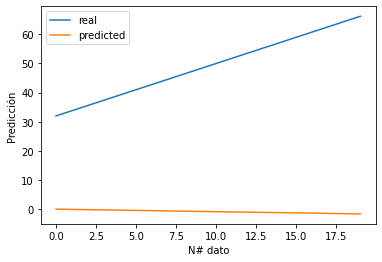

In [15]:
import matplotlib.pyplot as plt
predicted = modelo.predict(np.arange(20))
real = (np.arange(20) * 9/5 + 32 ) 
print(real)
plt.xlabel("N# dato")
plt.ylabel("Predicción")
plt.plot(real, label = "real")
plt.plot(predicted, label = "predicted")
plt.legend()

Entrenamos el modelo

In [27]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


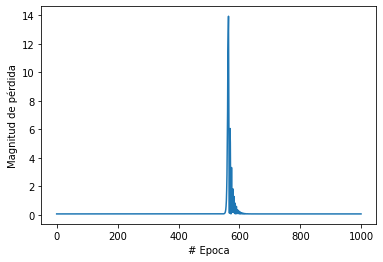

In [25]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [19]:
print("Hagamos una predicción!")
resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
El resultado es [[211.74734]] fahrenheit!


Podemos imprimir los pesos encontrados en el entrenamiento para cada capa

In [21]:
print("Variables internas del modelo")
#print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[ 0.67944175, -0.22816044, -0.29819828]], dtype=float32), array([ 3.6006923,  2.6145155, -3.1748433], dtype=float32)]
[array([[-0.56746614, -0.40035504, -1.5964828 ],
       [-1.2735195 , -0.67233354,  0.23218252],
       [ 0.79795766,  0.96269727,  0.15675852]], dtype=float32), array([-3.5987065, -3.4423285, -3.107768 ], dtype=float32)]
[array([[-0.79227334],
       [-1.2350941 ],
       [-0.87222683]], dtype=float32), array([3.2300806], dtype=float32)]


Ahora vemos el output de los datos de testing con la red entrenada

[32.  33.8 35.6 37.4 39.2 41.  42.8 44.6 46.4 48.2 50.  51.8 53.6 55.4
 57.2 59.  60.8 62.6 64.4 66.2]


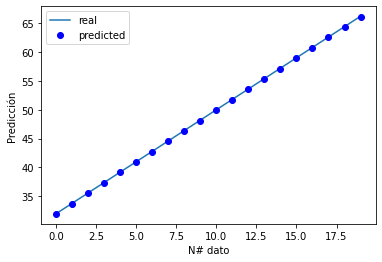

In [22]:
import matplotlib.pyplot as plt
predicted = modelo.predict(np.arange(20))
real = (np.arange(20) * 9/5 + 32 ) 
print(real)
plt.xlabel("N# dato")
plt.ylabel("Predicción")
plt.plot(real, label = "real")
plt.plot(predicted, "bo", label = "predicted")
plt.legend()

Ahora vemos un ejemplo no lineal

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


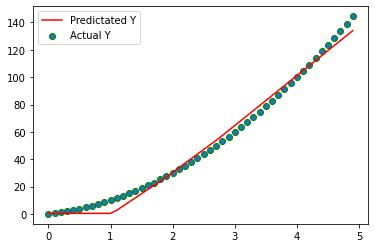

In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(0.0, 5.0, 0.1, dtype='float32').reshape(-1,1)
y = 5 * np.power(X,2) + 5*X

#model
model = Sequential()
model.add(Dense(50, activation='relu', input_dim=1))
model.add(Dense(30, activation='relu'))
model.add(Dense(units=1, activation='linear'))

#training
sgd = SGD(lr=0.0001);
model.compile(loss='mse', optimizer=sgd)
model.fit(X, y, epochs=1000, verbose=False)

#predictions
predictions = model.predict(X)

#plot
plt.scatter(X, y,edgecolors='g')
plt.plot(X, predictions,'r')
plt.legend([ 'Predictated Y' ,'Actual Y'])
plt.show()

In [ ]:
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten

model = Sequential()
model.add(Dense(16, input_shape=(256*256, 3)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(4))
model.compile(loss='mean_squared_error', optimizer='SGD')

x = np.array([[[1, 2], [3, 4], [5, 6]]])

y = model.predict(x)


In [ ]:
y

array([[-0.05492586,  0.7865854 , -1.1804297 , -0.23500787]],
      dtype=float32)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


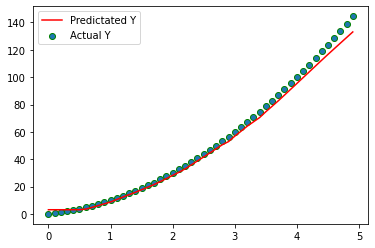

In [35]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(0.0, 5.0, 0.1, dtype='float32').reshape(-1,1)
y = 5 * np.power(X,2) + 5*X

#model
model = Sequential()
model.add(Dense(50, activation='relu', input_dim=1))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(units=1, activation='linear'))

#training
sgd = SGD(lr=0.0001);
model.compile(loss='mse', optimizer=sgd)
model.fit(X, y, epochs=1000, verbose=False)

#predictions
predictions = model.predict(X)

#plot
plt.scatter(X, y,edgecolors='g')
plt.plot(X, predictions,'r')
plt.legend([ 'Predictated Y' ,'Actual Y'])
plt.show()